相似度矩阵：
[[1.         0.88173981 0.71200839 0.94776783 0.94638521 0.93910637
  0.68561686 0.73128521 0.91101952 0.80323496]
 [0.88173981 1.         0.76808916 0.76884921 0.98555498 0.7247232
  0.92342444 0.78854888 0.91008569 0.91185793]
 [0.71200839 0.76808916 1.         0.77338785 0.77767197 0.71148547
  0.79424598 0.99929161 0.92406045 0.95388526]
 [0.94776783 0.76884921 0.77338785 1.         0.85219499 0.99393503
  0.59835719 0.78604242 0.9152292  0.79043788]
 [0.94638521 0.98555498 0.77767197 0.85219499 1.         0.81645195
  0.86102471 0.79808485 0.94094638 0.90376269]
 [0.93910637 0.7247232  0.71148547 0.99393503 0.81645195 1.
  0.53982323 0.72448475 0.86995687 0.72985274]
 [0.68561686 0.92342444 0.79424598 0.59835719 0.86102471 0.53982323
  1.         0.80890784 0.82836606 0.92006497]
 [0.73128521 0.78854888 0.99929161 0.78604242 0.79808485 0.72448475
  0.80890784 1.         0.93636159 0.96358643]
 [0.91101952 0.91008569 0.92406045 0.9152292  0.94094638 0.86995687
  0.82836606 0

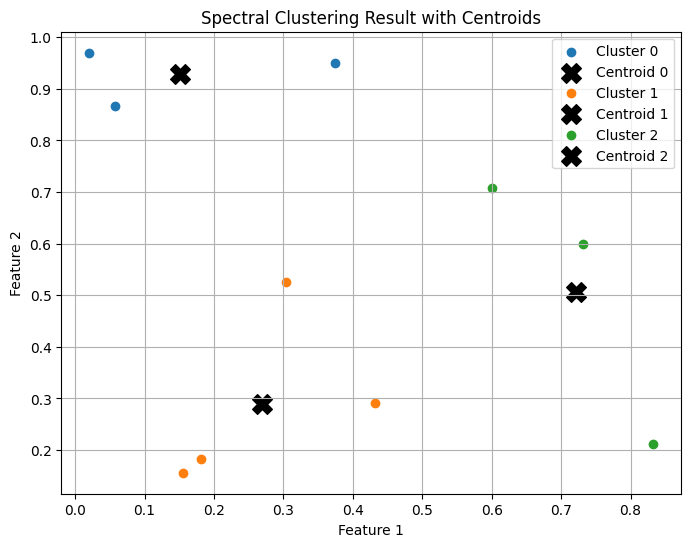

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances

# 给定的10个二维数据点
data_points = np.array([
    [0.37454012, 0.95071431],
    [0.73199394, 0.59865848],
    [0.15601864, 0.15599452],
    [0.05808361, 0.86617615],
    [0.60111501, 0.70807258],
    [0.02058449, 0.96990985],
    [0.83244264, 0.21233911],
    [0.18182497, 0.18340451],
    [0.30424224, 0.52475643],
    [0.43194502, 0.29122914]
])

# 计算相似度矩阵（这里使用高斯核相似度）
def compute_similarity_matrix(X, sigma=1.0):
    dist_sq = pairwise_distances(X, squared=True)
    return np.exp(-dist_sq / (2 * sigma ** 2))

# 计算相似度矩阵
similarity_matrix = compute_similarity_matrix(data_points)
print("相似度矩阵：")
print(similarity_matrix)

# 计算拉普拉斯矩阵
degree_matrix = np.diag(np.sum(similarity_matrix, axis=1))
laplacian_matrix = degree_matrix - similarity_matrix
print("\n拉普拉斯矩阵：")
print(laplacian_matrix)

# 使用谱聚类算法
n_clusters = 3  # 设定要分成的簇数
spectral_model = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
labels = spectral_model.fit_predict(similarity_matrix)

# 计算质心
centroids = np.array([data_points[labels == i].mean(axis=0) for i in range(n_clusters)])

# 可视化聚类结果
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(data_points[labels == i][:, 0], data_points[labels == i][:, 1], label=f'Cluster {i}')
    # 绘制质心
    plt.scatter(centroids[i][0], centroids[i][1], s=200, marker='X', c='k', label=f'Centroid {i}')
    
plt.title('Spectral Clustering Result with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
